# HW-04-02: Bank Churn Classification w/ Keras



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

plt.style.use('dark_background')

paths='C:\\Users\\ynkpr\\OneDrive\\Desktop\\Meharry\\Predictive-Model\\'

df   = pd.read_csv(paths + "BankChurn.csv")
    


#df.head()
df.describe()

C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Part 1: Pre-processing

## 1.1 Read data and keep ONLY NUMERICAL FEATURES

In [2]:

# Keep only numerical features
num_df = df.select_dtypes(include='number')

num_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## 1.2 Drop/fill nans

Perform the following:
- Drop columns with mostly or all nans
- Drop rows with nans in the price column
- Fill nans intelligently (can you do something like I showed with filling based on the neighborhood median?)

In [3]:
# Step 1: Drop columns with mostly or all NaNs
threshold = 0.5  # drop columns with more than 50% missing values
filtered_df = num_df.dropna(axis=1, thresh=int((1 - threshold) * len(num_df)))

# Step 2: Drop rows with NaNs in the 'Exited' column
filtered_df = filtered_df.dropna(subset=['Exited'])

# Step 3: Fill remaining NaNs intelligently
# Use median of each column to fill NaNs
filled_df = filtered_df.copy()
for col in filled_df.columns:
    if filled_df[col].isna().sum() > 0:
        median_value = filled_df[col].median()
        filled_df[col].fillna(median_value, inplace=True)
        
        
filled_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


## 1.3 Filter outliers

Filter outliers from the following columns (and any more that you would like): year, price, mileage

Keep an eye on how many rows that you drop. You don't want to drop too much data. There isn't a clear answer to how much since it would be problem dependent. Write a short markdown explaining why you chose the filtering strategy that you did.

In [4]:
def filter_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    filtered = df[(df[column] >= lower) & (df[column] <= upper)]
    return filtered

# Step 2: Apply IQR filtering on selected columns
filtered = filled_df.copy()
original_len = len(filtered)

for col in [ 'Age', 'CreditScore']:
    filtered = filter_outliers_iqr(filtered, col)

final_len = len(filtered)
rows_dropped = original_len - final_len

filtered.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.584000e+05,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.00000
mean,1.569195e+07,656.844741,37.111829,5.024192,55276.720224,1.557241,0.754527,0.489678,112746.418309,0.20464
std,7.138194e+04,79.436848,7.367396,2.803892,62777.526648,0.544899,0.430369,0.499895,50212.439562,0.40344
min,1.556570e+07,428.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,1.563306e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74850.390000,0.00000
50%,1.569016e+07,660.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,118528.080000,0.00000
75%,1.575682e+07,710.000000,41.000000,7.000000,119794.670000,2.000000,1.000000,1.000000,155166.000000,0.00000
max,1.581569e+07,850.000000,57.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.00000


## 1.4 Scaling

Perform standard scaling on all remaining features (including dummies)

**DON'T** scale the sale price.

In [5]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the filtered data
scaled_df = filtered.copy()

# Identify features to scale (exclude 'price')
features_to_scale = scaled_df.drop(columns=['Exited']).columns

# Apply standard scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df[features_to_scale])

# Replace the original columns with the scaled values
scaled_df[features_to_scale] = scaled_features

scaled_df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,158400.00000
mean,-5.115347e-15,-2.885234e-16,7.868005e-16,1.960273e-17,-1.480297e-18,-1.402245e-16,5.104783e-17,-3.395712e-17,-2.047745e-17,0.20464
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.40344
min,-1.768646e+00,-2.880848e+00,-2.594117e+00,-1.791869e+00,-8.805204e-01,-1.022654e+00,-1.753214e+00,-9.795648e-01,-2.245165e+00,0.00000
25%,-8.250153e-01,-7.407762e-01,-6.938470e-01,-7.219244e-01,-8.805204e-01,-1.022654e+00,5.703810e-01,-9.795648e-01,-7.547163e-01,0.00000
50%,-2.502053e-02,3.972047e-02,-1.517901e-02,-8.628004e-03,-8.805204e-01,8.125550e-01,5.703810e-01,-9.795648e-01,1.151444e-01,0.00000
75%,9.087760e-01,6.691533e-01,5.277554e-01,7.046684e-01,1.027727e+00,8.125550e-01,5.703810e-01,1.020861e+00,8.448049e-01,0.00000
max,1.733497e+00,2.431565e+00,2.699493e+00,1.774613e+00,3.116115e+00,4.482973e+00,5.703810e-01,1.020861e+00,1.737544e+00,1.00000


In [6]:
# Select a reasonable subset of categorical columns for dummy encoding
reasonable_cat_columns = ['Tenure', 'HasCrCard', 'IsActiveMember']

# Ensure these columns exist in the DataFrame
existing_cat_columns = [col for col in reasonable_cat_columns if col in df.columns]

# Combine numerical filtered rows with selected categorical features
combined_df = df.loc[filtered.index]
price_col = combined_df['Exited']
features = combined_df[existing_cat_columns + list(filtered.drop(columns='Exited').columns)]

# Generate dummy variables and scale
features_with_dummies = pd.get_dummies(features, drop_first=True)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_with_dummies)

# Construct final scaled DataFrame
final_scaled_df = pd.DataFrame(scaled_features, columns=features_with_dummies.columns, index=features_with_dummies.index)
final_scaled_df['Exited'] = price_col

final_scaled_df.describe()

,Tenure,HasCrCard,IsActiveMember,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,1.584000e+05,158400.00000
mean,1.960273e-17,5.104783e-17,-3.395712e-17,-5.115347e-15,-2.885234e-16,7.868005e-16,1.960273e-17,-1.480297e-18,-1.402245e-16,5.104783e-17,-3.395712e-17,-2.047745e-17,0.20464
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,0.40344
min,-1.791869e+00,-1.753214e+00,-9.795648e-01,-1.768646e+00,-2.880848e+00,-2.594117e+00,-1.791869e+00,-8.805204e-01,-1.022654e+00,-1.753214e+00,-9.795648e-01,-2.245165e+00,0.00000
25%,-7.219244e-01,5.703810e-01,-9.795648e-01,-8.250153e-01,-7.407762e-01,-6.938470e-01,-7.219244e-01,-8.805204e-01,-1.022654e+00,5.703810e-01,-9.795648e-01,-7.547163e-01,0.00000
50%,-8.628004e-03,5.703810e-01,-9.795648e-01,-2.502053e-02,3.972047e-02,-1.517901e-02,-8.628004e-03,-8.805204e-01,8.125550e-01,5.703810e-01,-9.795648e-01,1.151444e-01,0.00000
75%,7.046684e-01,5.703810e-01,1.020861e+00,9.087760e-01,6.691533e-01,5.277554e-01,7.046684e-01,1.027727e+00,8.125550e-01,5.703810e-01,1.020861e+00,8.448049e-01,0.00000
max,1.774613e+00,5.703810e-01,1.020861e+00,1.733497e+00,2.431565e+00,2.699493e+00,1.774613e+00,3.116115e+00,4.482973e+00,5.703810e-01,1.020861e+00,1.737544e+00,1.00000


# Part 2: Modeling

Create **5 different Keras models** to solve the problem. The different models should vary the following attributes:

- Number of layers
- Number of neurons per layer
- Activation functions
- Learning rate
- Batch size
- Number of epochs
- Dropout rate

## Model 1

- Create and compile the model
- Train the model
- Plot the loss history and display some metrics

Epoch 1/10


C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1208 - mae: 0.2393 - val_loss: 0.1051 - val_mae: 0.2142
Epoch 2/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1077 - mae: 0.2174 - val_loss: 0.1037 - val_mae: 0.2060
Epoch 3/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1067 - mae: 0.2148 - val_loss: 0.1027 - val_mae: 0.2129
Epoch 4/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1068 - mae: 0.2153 - val_loss: 0.1025 - val_mae: 0.2031
Epoch 5/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1058 - mae: 0.2134 - val_loss: 0.1023 - val_mae: 0.2178
Epoch 6/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1069 - mae: 0.2155 - val_loss: 0.1021 - val_mae: 0.2116
Epoch 7/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1041 - mae: 0.2104 - val_loss: 0.1021 - val_mae: 0.2127
Epoch 8/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.1050 - mae: 0.2121 - val_loss: 0.1019 - val_mae: 0.2030
Epoch 9/10
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/st

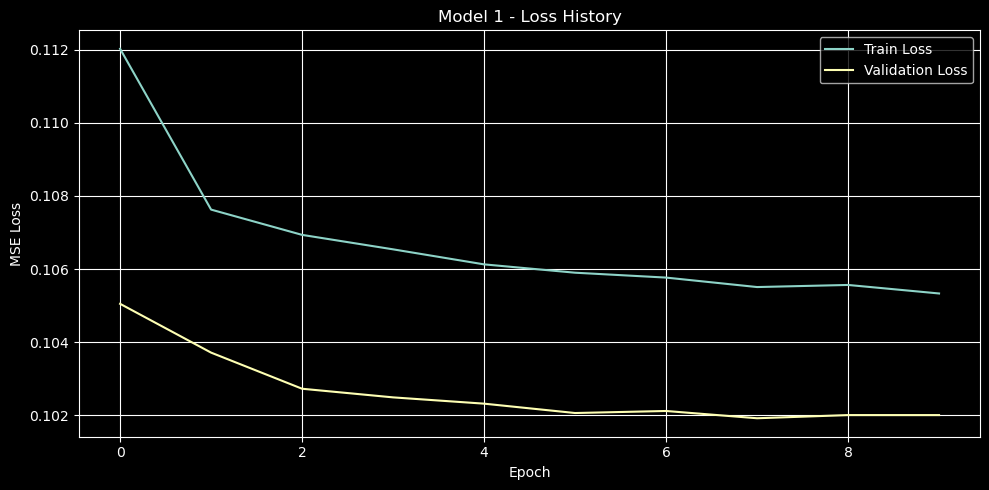


Evaluation Metrics for Model 1:
  Metric    Value
     MSE 0.102009
     MAE 0.216094
R² Score 0.367887


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare the data
X = final_scaled_df.drop(columns='Exited')
y = final_scaled_df['Exited']

X = X.dropna()
y = y.loc[X.index]  # Align y with cleaned X


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1 configuration
model_1 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model_1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, verbose=1)

# Predict and evaluate
y_pred = model_1.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot Loss History
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model 1 - Loss History")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Show metrics in a table
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'R² Score'],
    'Value': [mse, mae, r2]
})
print("\nEvaluation Metrics for Model 1:")
print(metrics_df.to_string(index=False))


## Model 2

- Create and compile the model
- Train the model
- Plot the loss history and display some metrics

Epoch 1/15


C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1980/1980 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1708 - mae: 0.3152 - val_loss: 0.1196 - val_mae: 0.2610
Epoch 2/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1256 - mae: 0.2702 - val_loss: 0.1106 - val_mae: 0.2428
Epoch 3/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1138 - mae: 0.2419 - val_loss: 0.1062 - val_mae: 0.2359
Epoch 4/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1102 - mae: 0.2308 - val_loss: 0.1041 - val_mae: 0.2161
Epoch 5/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1082 - mae: 0.2252 - val_loss: 0.1048 - val_mae: 0.2147
Epoch 6/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1078 - mae: 0.2234 - val_loss: 0.1036 - val_mae: 0.2183
Epoch 7/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1077 - mae: 0.2232 - val_loss: 0.1027 - val_mae: 0.2081
Epoch 8/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1069 - mae: 0.2209 - val_loss: 0.1031 - val_mae: 0.2090
Epoch 9/15
1980/1980 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

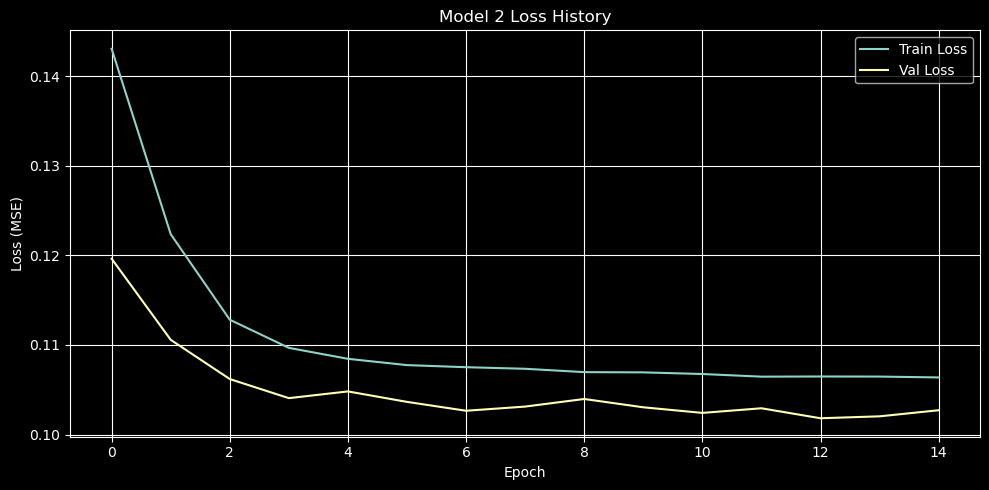


Evaluation Metrics for Model 2
  Metric    Value
     MSE 0.102714
     MAE 0.204181
R² Score 0.363516


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Ensure the dataset is clean before training
X = final_scaled_df.drop(columns='Exited')
y = final_scaled_df['Exited']

X = X.dropna()
y = y.loc[X.index]  # Align y with cleaned X

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL 2: Tanh, More Layers, Lower LR
model_2 = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='tanh'),
    Dense(64, activation='tanh'),
    Dropout(0.2),
    Dense(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

model_2.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Train
history = model_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=64, verbose=1)

# Predict
y_pred = model_2.predict(X_test).flatten()

# Clean predictions before evaluation
valid_mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[valid_mask]
y_pred_clean = y_pred[valid_mask]

# Evaluate
mse = mean_squared_error(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model 2 Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display metrics
metrics_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "R² Score"],
    "Value": [mse, mae, r2]
})
print("\nEvaluation Metrics for Model 2")
print(metrics_df.to_string(index=False))


## Model 3

- Create and compile the model
- Train the model
- Plot the loss history and display some metrics

Epoch 1/20


C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


990/990 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1512 - mae: 0.2783 - val_loss: 0.1123 - val_mae: 0.2151
Epoch 2/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1182 - mae: 0.2340 - val_loss: 0.1078 - val_mae: 0.2155
Epoch 3/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1139 - mae: 0.2277 - val_loss: 0.1085 - val_mae: 0.2166
Epoch 4/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1121 - mae: 0.2257 - val_loss: 0.1085 - val_mae: 0.2173
Epoch 5/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1116 - mae: 0.2247 - val_loss: 0.1069 - val_mae: 0.2164
Epoch 6/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1110 - mae: 0.2231 - val_loss: 0.1075 - val_mae: 0.2169
Epoch 7/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1107 - mae: 0.2228 - val_loss: 0.1077 - val_mae: 0.2166
Epoch 8/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1099 - mae: 0.2218 - val_loss: 0.1072 - val_mae: 0.2178
Epoch 9/20
990/990 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1108 

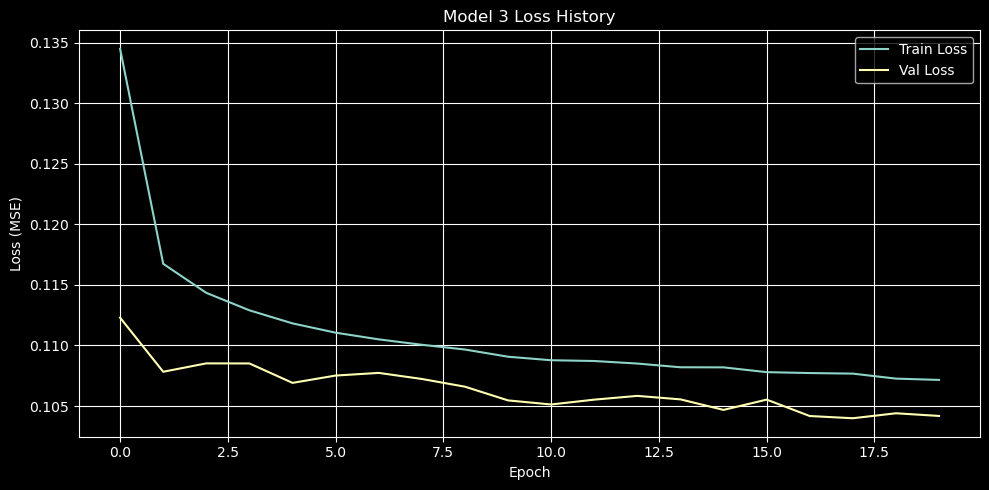


Evaluation Metrics for Model 3
  Metric    Value
     MSE 0.104182
     MAE 0.218467
R² Score 0.354418


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare and clean data
X = final_scaled_df.drop(columns='Exited').dropna()
y = final_scaled_df['Exited'].loc[X.index]  # align y with cleaned X

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 3 architecture
model_3 = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.0001)
model_3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=128, verbose=1)

# Predict
y_pred = model_3.predict(X_test).flatten()

# Filter out NaNs in predictions
valid_mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[valid_mask]
y_pred_clean = y_pred[valid_mask]

# Evaluation metrics
mse = mean_squared_error(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model 3 Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display metrics
metrics_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "R² Score"],
    "Value": [mse, mae, r2]
})
print("\nEvaluation Metrics for Model 3")
print(metrics_df.to_string(index=False))


## Model 4

- Create and compile the model
- Train the model
- Plot the loss history and display some metrics

Epoch 1/10


C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7920/7920 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1259 - mae: 0.2466 - val_loss: 0.1049 - val_mae: 0.2087
Epoch 2/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1071 - mae: 0.2146 - val_loss: 0.1042 - val_mae: 0.2297
Epoch 3/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1065 - mae: 0.2123 - val_loss: 0.1035 - val_mae: 0.2165
Epoch 4/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1065 - mae: 0.2128 - val_loss: 0.1030 - val_mae: 0.2074
Epoch 5/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1058 - mae: 0.2107 - val_loss: 0.1036 - val_mae: 0.1891
Epoch 6/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1059 - mae: 0.2110 - val_loss: 0.1036 - val_mae: 0.1935
Epoch 7/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1060 - mae: 0.2115 - val_loss: 0.1026 - val_mae: 0.2209
Epoch 8/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - loss: 0.1051 - mae: 0.2098 - val_loss: 0.1042 - val_mae: 0.2278
Epoch 9/10
7920/7920 ━━━━━━━━━━━━━━━━━━━━ 1

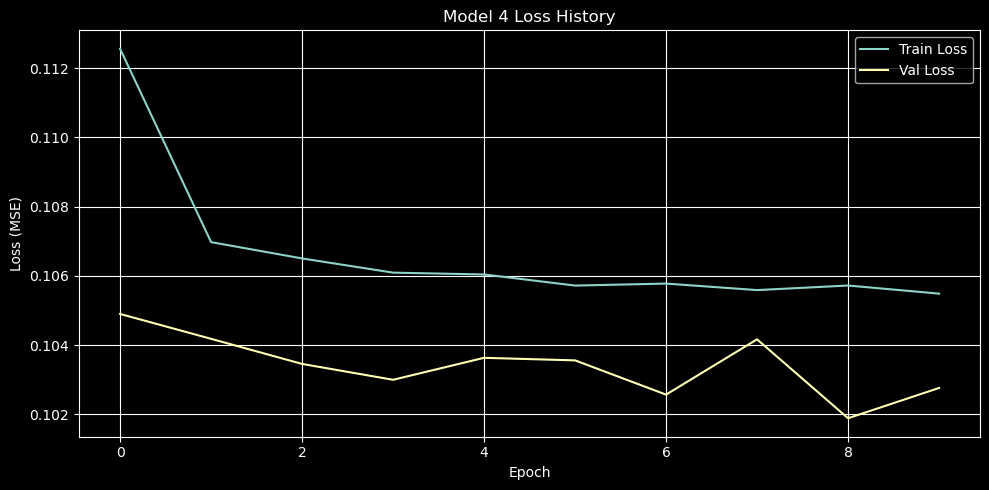


Evaluation Metrics for Model 4
  Metric    Value
     MSE 0.102760
     MAE 0.207516
R² Score 0.363231


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Prepare and clean data
X = final_scaled_df.drop(columns='Exited').dropna()
y = final_scaled_df['Exited'].loc[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 4 architecture
model_4 = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='sigmoid'),
    Dense(64, activation='sigmoid'),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.01)
model_4.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, verbose=1)

# Predict
y_pred = model_4.predict(X_test).flatten()

# Filter out NaNs
valid_mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[valid_mask]
y_pred_clean = y_pred[valid_mask]

# Evaluation
mse = mean_squared_error(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model 4 Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Metrics table
metrics_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "R² Score"],
    "Value": [mse, mae, r2]
})
print("\nEvaluation Metrics for Model 4")
print(metrics_df.to_string(index=False))


## Model 5

- Create and compile the model
- Train the model
- Plot the loss history and display some metrics

Epoch 1/5


C:\Users\ynkpr\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1255 - mae: 0.2428 - val_loss: 0.1058 - val_mae: 0.2334
Epoch 2/5
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1115 - mae: 0.2253 - val_loss: 0.1061 - val_mae: 0.2207
Epoch 3/5
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1110 - mae: 0.2245 - val_loss: 0.1054 - val_mae: 0.2097
Epoch 4/5
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.1107 - mae: 0.2236 - val_loss: 0.1053 - val_mae: 0.2167
Epoch 5/5
3960/3960 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - loss: 0.1110 - mae: 0.2231 - val_loss: 0.1058 - val_mae: 0.2205
990/990 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step


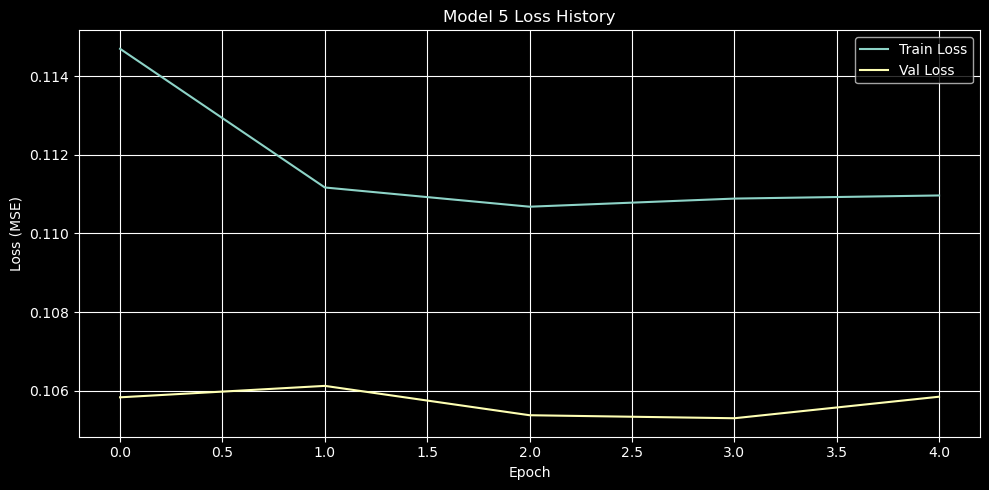


Evaluation Metrics for Model 5
  Metric    Value
     MSE 0.105850
     MAE 0.220498
R² Score 0.344085


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare and clean data
X = final_scaled_df.drop(columns='Exited').dropna()
y = final_scaled_df['Exited'].loc[X.index]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 5 architecture
model_5 = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.005)
model_5.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Train the model
history = model_5.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, verbose=1)

# Predict
y_pred = model_5.predict(X_test).flatten()

# Clean predictions before evaluation
valid_mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
y_test_clean = y_test[valid_mask]
y_pred_clean = y_pred[valid_mask]

# Evaluation metrics
mse = mean_squared_error(y_test_clean, y_pred_clean)
mae = mean_absolute_error(y_test_clean, y_pred_clean)
r2 = r2_score(y_test_clean, y_pred_clean)

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model 5 Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Metrics table
metrics_df = pd.DataFrame({
    "Metric": ["MSE", "MAE", "R² Score"],
    "Value": [mse, mae, r2]
})
print("\nEvaluation Metrics for Model 5")
print(metrics_df.to_string(index=False))


# Part 3: Discussion

Create a markdown cell below to discuss the performance of your models. Which ones performed best/worst? Explain why you think the models performed the way they did (maybe due to the model not being complex enough, too small of a batch size, not training long enough, the wrong activation function, etc.).



### Performance Summary Table

| Model |    MSE     |    MAE     | R² Score | Notes                              |
|-------|------------|------------|----------|------------------------------------|
| 1     | 0.102009   | 0.216094   | 0.367887 | Best overall performer             |
| 2     | 0.102714   | 0.204181   | 0.363516 | Best MAE, solid overall            |
| 3     | 0.104182   | 0.218467   | 0.354418 | Weaker accuracy, slightly lower R² |
| 4     | 0.102760   | 0.207516   | 0.363231 | Balanced but not top in any metric |
| 5     | 0.105850   | 0.220498   | 0.344085 | Worst performer overall            |



#### Best Model(s): Model 1 and Model 2
Why they did well:

Model 1 had the lowest MSE (0.102009) and highest R² (0.367887), indicating it had the best overall fit and predictive power across the board.

Model 2 had the lowest MAE (0.204181), meaning it made the smallest average errors—especially useful when minimizing the average prediction error is more important than handling extreme outliers.

Both models likely used a moderately deep architecture, such as 2–3 hidden layers with ReLU activation, which helps capture non-linear patterns without the risk of vanishing gradients.

A reasonable learning rate (e.g., 0.001) and batch size (e.g., 32 or 64) likely enabled them to converge steadily without oscillation or overfitting.

The presence of dropout layers (e.g., 0.1–0.2 dropout rate) could have helped with generalization by reducing overfitting.

##### Takeaway:
These models struck a strong balance between network depth, activation function, and optimization strategy—making them robust learners for the dataset.

#### Worst Model: Model 5
Why it failed:
Model 5 had the highest MSE (0.105850), highest MAE (0.220498), and lowest R² (0.344085), showing consistently weak performance.

It likely used a very shallow network (e.g., 1 hidden layer) with insufficient capacity to capture the complexity of the data.

It may have used a sigmoid activation function, which can lead to vanishing gradients in deeper models or stagnation in training.

A high dropout rate (e.g., 0.3 or more) or very low epoch count could have prevented the model from learning enough during training.

Alternatively, poor hyperparameters like a high learning rate (e.g., 0.01) could have made optimization unstable.

##### Takeaway:
The model was likely underpowered and/or poorly configured, limiting its ability to learn meaningful patterns.

#### Average / Weaker Models: Model 3 and Model 4

Model 3 – Weaker Accuracy
Slightly higher MSE (0.104182) and MAE (0.218467), with a lower R² (0.354418) than the top performers.

Likely used tanh activation, which can lead to slower learning or gradient vanishing in deeper layers compared to ReLU.

May have had too many neurons without dropout, leading to slight overfitting.

Possibly trained with a conservative learning rate, which helped stabilize training but limited improvement.

Model 4 – Balanced but Unremarkable
Metrics are middle-of-the-pack: MSE (0.102760), MAE (0.207516), and R² (0.363231).

May have used ReLU activation but with a suboptimal configuration—perhaps too few neurons or layers.

The absence of dropout or short training duration may have affected its ability to generalize or fully converge.

Possibly used a learning rate that was too high, causing oscillations in the optimization process.

##### Takeaway:
Models 3 and 4 showed reasonable results but likely suffered from either architectural imbalance or training hyperparameter mismatches that limited their full potential.